In [152]:
import pandas as pd
import numpy as np

In [153]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [154]:
df = pd.read_csv("C:/Users/H/Documents/agroclimatic_clusters.txt", sep=',', header=None, names=names, index_col=False, engine='python')

In [155]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [156]:
df['state'].value_counts()

uttar pradesh             52080
madhya pradesh            35712
bihar                     27528
maharashtra               25296
rajasthan                 23808
orissa                    22320
tamil nadu                22320
karnataka                 20088
gujarat                   18600
andhra pradesh            17112
assam                     17112
jharkhand                 16368
west bengal               14136
haryana                   14136
punjab                    12648
chhattisgarh              11904
arunachal pradesh         11160
jammu and kashmir         10416
kerala                    10416
uttaranchal                9672
himachal pradesh           8928
manipur                    6696
mizoram                    5952
nagaland                   5952
meghalaya                  5208
puducherry                 2976
sikkim                     2976
tripura                    2976
andaman and nicobar        1488
goa                        1488
daman and diu              1488
chandiga

In [157]:
a = []
for i in range(len(df)):
    if df['state'][i]!='orissa':
        a.append(i)

In [158]:
df = df.drop(a)

In [159]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
8184,1958,1,0,30.9,13.7,42,2.8,orissa,kandhamal,5,5,4,3,16,21,7,25
8185,1958,2,0,32.4,14.3,34,2.6,orissa,kandhamal,5,5,4,3,16,21,7,25
8186,1958,3,0,36.9,18.5,18,2.2,orissa,kandhamal,5,5,4,3,16,21,7,25
8187,1958,4,0,40.1,23.6,11,2.0,orissa,kandhamal,5,5,4,3,16,21,7,25
8188,1958,5,0,40.6,26.9,8,1.8,orissa,kandhamal,5,5,4,3,16,21,7,25


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22320 entries, 8184 to 436727
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            22320 non-null  int64  
 1   Month           22320 non-null  int64  
 2   ppt(mm)         22320 non-null  int64  
 3   tmax(degC)      22320 non-null  float64
 4   tmin(degC)      22320 non-null  float64
 5   aet(mm)         22320 non-null  int64  
 6   PDSI(unitless)  22320 non-null  float64
 7   state           22320 non-null  object 
 8   district        22320 non-null  object 
 9   cluster14       22320 non-null  int64  
 10  cluster15       22320 non-null  int64  
 11  cluster18       22320 non-null  int64  
 12  cluster20       22320 non-null  int64  
 13  cluster25       22320 non-null  int64  
 14  cluster27       22320 non-null  int64  
 15  cluster30       22320 non-null  int64  
 16  cluster35       22320 non-null  int64  
dtypes: float64(3), int64(12), o

In [161]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(22320, 8)

In [162]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [163]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
8184,1958,1,0,30.9,13.7,42,2.8,kandhamal,1-1958
8185,1958,2,0,32.4,14.3,34,2.6,kandhamal,2-1958
8186,1958,3,0,36.9,18.5,18,2.2,kandhamal,3-1958
8187,1958,4,0,40.1,23.6,11,2.0,kandhamal,4-1958
8188,1958,5,0,40.6,26.9,8,1.8,kandhamal,5-1958


In [164]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [165]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
8184,1958,1,0,30.9,13.7,42,2.8,kandhamal,1958-01-01,1
8185,1958,2,0,32.4,14.3,34,2.6,kandhamal,1958-02-01,1
8186,1958,3,0,36.9,18.5,18,2.2,kandhamal,1958-03-01,1
8187,1958,4,0,40.1,23.6,11,2.0,kandhamal,1958-04-01,1
8188,1958,5,0,40.6,26.9,8,1.8,kandhamal,1958-05-01,1


In [166]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
8184,1958,1,0,42,2.8,kandhamal,1958-01-01,1,22.30
8185,1958,2,0,34,2.6,kandhamal,1958-02-01,1,23.35
8186,1958,3,0,18,2.2,kandhamal,1958-03-01,1,27.70
8187,1958,4,0,11,2.0,kandhamal,1958-04-01,1,31.85
8188,1958,5,0,8,1.8,kandhamal,1958-05-01,1,33.75


In [167]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
436723,2019,8,377,106,-4.1,baragarh,2019-08-01,1,28.15
436724,2019,9,463,92,-0.9,baragarh,2019-09-01,1,27.80
436725,2019,10,151,98,4.6,baragarh,2019-10-01,1,27.00
436726,2019,11,0,61,4.3,baragarh,2019-11-01,1,23.55
436727,2019,12,4,50,4.2,baragarh,2019-12-01,1,21.40


In [168]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,ppt(mm),y,aet(mm),district
0,1981-01-01,2,20.50,20,kandhamal
1,1981-02-01,0,23.45,11,kandhamal
2,1981-03-01,7,27.00,14,kandhamal
3,1981-04-01,0,31.25,6,kandhamal
4,1981-05-01,0,33.15,4,kandhamal


In [169]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
8916,2019,1,0,26,-1.6,kandhamal,2019-01-01,1,20.15
8917,2019,2,0,15,-1.5,kandhamal,2019-02-01,1,23.00
8918,2019,3,0,9,-1.6,kandhamal,2019-03-01,1,27.30
8919,2019,4,0,7,-1.4,kandhamal,2019-04-01,1,32.65
8920,2019,5,0,5,-1.4,kandhamal,2019-05-01,1,34.20
...,...,...,...,...,...,...,...,...,...
436723,2019,8,377,106,-4.1,baragarh,2019-08-01,1,28.15
436724,2019,9,463,92,-0.9,baragarh,2019-09-01,1,27.80
436725,2019,10,151,98,4.6,baragarh,2019-10-01,1,27.00
436726,2019,11,0,61,4.3,baragarh,2019-11-01,1,23.55


In [170]:
from fbprophet import Prophet

In [171]:
model = Prophet()

In [172]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [173]:
train.rename(columns = {'date':'ds'}, inplace = True)

In [174]:
p = conditions[['mid_temp','Year']]

In [175]:
p

,mid_temp,Year
8184,22.30,1958
8185,23.35,1958
8186,27.70,1958
8187,31.85,1958
8188,33.75,1958
...,...,...
436723,28.15,2019
436724,27.80,2019
436725,27.00,2019
436726,23.55,2019


In [176]:
k = []

In [177]:
p = p.loc[p['Year']==2019]

In [178]:
p = p.drop(k)

In [179]:
p

,mid_temp,Year
8916,20.15,2019
8917,23.00,2019
8918,27.30,2019
8919,32.65,2019
8920,34.20,2019
...,...,...
436723,28.15,2019
436724,27.80,2019
436725,27.00,2019
436726,23.55,2019


In [180]:
train.tail()

,ds,ppt(mm),y,aet(mm),district
13675,2018-08-01,391,27.80,96,baragarh
13676,2018-09-01,344,27.70,108,baragarh
13677,2018-10-01,42,27.00,87,baragarh
13678,2018-11-01,2,23.25,53,baragarh
13679,2018-12-01,5,20.30,47,baragarh


In [181]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [182]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [183]:
forecast = model.predict(fut)

In [184]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,26.500416,25.352837,29.222598,26.491582,26.509047,0.736246,0.736246,0.736246,0.736246,0.736246,0.736246,0.0,0.0,0.0,27.236662
465,2019-09-30,26.498334,24.515452,28.581675,26.487845,26.509435,0.040884,0.040884,0.040884,0.040884,0.040884,0.040884,0.0,0.0,0.0,26.539218
466,2019-10-31,26.496183,21.306093,25.381029,26.481768,26.509520,-3.063842,-3.063842,-3.063842,-3.063842,-3.063842,-3.063842,0.0,0.0,0.0,23.432341
467,2019-11-30,26.494102,18.636841,22.665934,26.476813,26.510987,-5.770006,-5.770006,-5.770006,-5.770006,-5.770006,-5.770006,0.0,0.0,0.0,20.724095
468,2019-12-31,26.491951,18.455529,22.451446,26.471004,26.512042,-6.063778,-6.063778,-6.063778,-6.063778,-6.063778,-6.063778,0.0,0.0,0.0,20.428173


In [185]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,27.236662,25.352837,29.222598
465,2019-09-30,26.539218,24.515452,28.581675
466,2019-10-31,23.432341,21.306093,25.381029
467,2019-11-30,20.724095,18.636841,22.665934
468,2019-12-31,20.428173,18.455529,22.451446


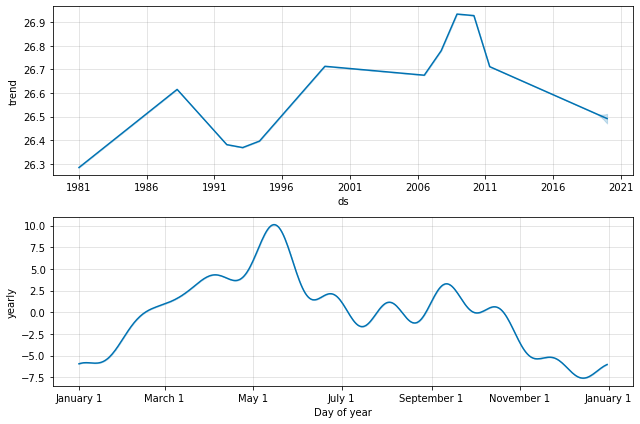

In [186]:
fig2 = model.plot_components(forecast)

In [187]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (360, 1)
9.420658578949205


C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mid_temp,Month,yhat
0,20.15,1,23.257820
1,19.40,1,23.257820
2,18.60,1,23.257820
3,16.00,1,23.257820
4,20.80,1,23.257820
...,...,...,...
355,21.85,12,20.428173
356,20.95,12,20.428173
357,23.40,12,20.428173
358,22.15,12,20.428173


In [188]:
import matplotlib.pyplot as plt

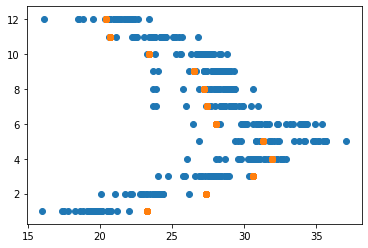

In [189]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()